# Исследование: анализ данных о продаже компьютерных игр

<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">
        
Интернет-магазин "Стримчик" 🚀 планирует кампанию по продаже компьютерных игр за 2016 год. В распоряжении компании есть исторические данные о продажах за предыдущие года. На основе этих данных необходимо выявить закономерности, определяющие успешность игр. Результаты позволят спланировать рекламную кампанию на 2017 год.

**Цель исследования**: определить закономерности успешных игр.

**Задачи исследования**: исследовать данные, составить портрет пользователея по регионам и проверить интересующие гипотезы.

**План**:

1. Загрузка и обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Подведение итогов
7. Рекомендации

## Загрузка и обзор данных

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.to_csv('games.csv', index=False)

### Обзор данных

In [3]:
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div style="background-color:#6C7379; color:#ffffff; text-align:center; padding:2%">

Посмотрим, за какой период предоставлены данные.

In [5]:
display(df['Year_of_Release'].max())
df['Year_of_Release'].min()

2016.0

1980.0

In [6]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

### Вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">

1. Файл `games.csv` содержит 16 715 строк с информацией об играх с 11 характеристиками в каждой.


2. Данные содержат 11435 игр, выпущенные с 1980 года по 2016 год и представленные в 12 жанрах.


3. Данные нуждаются в объемной предобработке.

## Предобработка данных

### Стандартизация названий столбцов

In [7]:
df.columns = df.columns.str.lower()

df = df.rename(columns={
    'year_of_release': 'year', # данные значения ни с чем не спутать, поэтому сделаем название более лаконичным
    'rating': 'esrb_rating' # речь идет именно о ESRB рейтинге
})

### Добавление столбца общих продаж

In [8]:
# рассчитаем общее количество продаж
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Изменение типа данных

In [9]:
df.dtypes

name             object
platform         object
year            float64
genre            object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
critic_score    float64
user_score       object
esrb_rating      object
total_sales     float64
dtype: object

In [10]:
# тип данных зависит от пропущенных значений
df.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
esrb_rating     6766
total_sales        0
dtype: int64

#### `na_sales`, `eu_sales`, `jp_sales` и `other_sales`

In [11]:
# уменьшим занимаемый объем памяти для уже составленных столбцов
df['na_sales'] = df['na_sales'].astype('float32')
df['eu_sales'] = df['eu_sales'].astype('float32')
df['jp_sales'] = df['jp_sales'].astype('float32')
df['other_sales'] = df['other_sales'].astype('float32')

#### `user_score`, `rating`

<div style="background-color:#6C7379; color:#ffffff; text-align:start; padding:2%">

1. TBD ("to be determined") - аббревиатура, использующаяся при отсутствии оценок или при в момент сбора оценок. В нашем случае это важно только при анализе `user_score`. Чтобы данные не влияли на ход исследования, в дальнейшем заменим эти абревиатуры тем же способом, что и пропущенные значения. Тип данных после станет `float32`.
    
    
2. ESRB ("Entertainment Software Rating Board") - организация, занимающаяся принятем рейтинга игры в соответствии с содержанием и определяющая возрастные ограничения. В дальнейшем выделим пропущенные значения соответствующего столбца в отдельную категорию. Тип данных останется прежним.

#### Промежуточный вывод


<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">

    

1. Значения "tbd" столбца `user_score` можно обработать аналогично пропущенным значениям.


2. Изменить тип данных столбцов `year` и `critic_score` можно после обработки пропущенных значений.

### Анализ и обработка пропущенных значений

<div style="background-color:#6C7379; color:#ffffff; text-align:start; padding:2%">

Заменим пропущенные ячейки на логичные значения, значения-заглушки или удалим строки вовсе. Количество пропущенных значений не должно превышать 1670 строк (10% от общего количества).

In [12]:
df.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
esrb_rating     6766
total_sales        0
dtype: int64

#### `name` и `genre`

In [13]:
df.query('name.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


<div style="background-color:#6C7379; color:#ffffff; text-align:start; padding:2%">
    
Все пропущенные значения данных столбцов содержатся в двух одинаковых строках. Так как игры разные, можем заполнить пропущенные ячейки "названиями-заглушками".

In [14]:
# изменим игру строки 659
df.loc[659, 'name'] = 'name_1'
df.loc[659, 'genre'] = 'genre_1'

# изменим игру строки 14244
df.loc[14244, 'name'] = 'name_2'
df.loc[14244, 'genre'] = 'genre_2'

#### `year`

In [15]:
df.query('year.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div style="background-color:#6C7379; color:#ffffff; text-align:start; padding:2%">
    
Для некоторых игр год пропущен, вероятно, из-за наличия в названии, поэтому год можно определить. Это будет тот же год или предыдущей, что можно будет дополнить реальным значением.

In [16]:
for el in df.query('year.isna()')['name'].unique():
    if ('20' or '19') in el:
        print(el)

Madden NFL 2004
FIFA Soccer 2004
wwe Smackdown vs. Raw 2006
NASCAR Thunder 2003
MLB SlugFest 20-03
PES 2009: Pro Evolution Soccer
Madden NFL 2002
NFL GameDay 2003
NBA Live 2003
Tomb Raider (2013)
All-Star Baseball 2005
Jet X20
Tour de France 2011
Sega Rally 2006
PDC World Championship Darts 2008
Football Manager 2007


In [17]:
# в списке игры, выпущенные только после 2000 года
# большинство спортивных игр всегда выпускаются годом ранее
# для остальных попавшихся в список найдем значения в интернете
df.loc[((df['year'].isna()) & (df['name'] == "Madden NFL 2004"), 'year')] = 2003
df.loc[((df['year'].isna()) & (df['name'] == "FIFA Soccer 2004"), 'year')] = 2003
df.loc[((df['year'].isna()) & (df['name'] == "wwe Smackdown vs. Raw 2006"), 'year')] = 2005
df.loc[((df['year'].isna()) & (df['name'] == "NASCAR Thunder 2003"), 'year')] = 2002
df.loc[((df['year'].isna()) & (df['name'] == "MLB SlugFest 20-03"), 'year')] = 2002
df.loc[((df['year'].isna()) & (df['name'] == "PES 2009: Pro Evolution Soccer"), 'year')] = 2008
df.loc[((df['year'].isna()) & (df['name'] == "NFL GameDay 2003"), 'year')] = 2002
df.loc[((df['year'].isna()) & (df['name'] == "Tomb Raider (2013)"), 'year')] = 2013
df.loc[((df['year'].isna()) & (df['name'] == "All-Star Baseball 2005"), 'year')] = 2004
df.loc[((df['year'].isna()) & (df['name'] == "Jet X20"), 'year')] = 2002
df.loc[((df['year'].isna()) & (df['name'] == "Tour de France 2011"), 'year')] = 2011
df.loc[((df['year'].isna()) & (df['name'] == "Sega Rally 2006"), 'year')] = 2006
df.loc[((df['year'].isna()) & (df['name'] == "PDC World Championship Darts 2008"), 'year')] = 2008
df.loc[((df['year'].isna()) & (df['name'] == "Football Manager 2007"), 'year')] = 2006

In [18]:
# подсчитаем количество оставшихся значений с пропущенной датой выпуска
df.query('year.isna()')['name'].count()

253

In [19]:
# удалим их
df = df.dropna(subset=['year'])

# окончательно определим тип данных
df['year'] = df['year'].astype('int32')

#### `esrb_rating`

In [20]:
df['esrb_rating'] = df['esrb_rating'].fillna('no_rating')

In [31]:
# заменим значения "tbd" на пустые
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. Удалены 253 строки (1.5 % от начального количества) и обработаны все остальные значения.


2. Численные данные заменены на логичные по смыслу медианные значения для разработанных категорий. Строчные данные заменены на "названия-заглушки". Оставлены пропущенные значения в столбцах `user_score` и `critic_score`.

In [32]:
# сгруппируем столбцы по смыслу
df = df[['name', 'platform', 'year', 'genre',
         'na_sales', 'eu_sales', 'jp_sales',
         'other_sales', 'total_sales',
         'critic_score',
         'user_score', 'esrb_rating']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16462 non-null  object 
 1   platform      16462 non-null  object 
 2   year          16462 non-null  int32  
 3   genre         16462 non-null  object 
 4   na_sales      16462 non-null  float32
 5   eu_sales      16462 non-null  float32
 6   jp_sales      16462 non-null  float32
 7   other_sales   16462 non-null  float32
 8   total_sales   16462 non-null  float64
 9   critic_score  7993 non-null   float64
 10  user_score    7471 non-null   float64
 11  esrb_rating   16462 non-null  object 
dtypes: float32(4), float64(3), int32(1), object(4)
memory usage: 1.3+ MB


In [33]:
# Код ревьюера
print(df.dtypes)
display(df.isna().sum())

name             object
platform         object
year              int32
genre            object
na_sales        float32
eu_sales        float32
jp_sales        float32
other_sales     float32
total_sales     float64
critic_score    float64
user_score      float64
esrb_rating      object
dtype: object


name               0
platform           0
year               0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
total_sales        0
critic_score    8469
user_score      8991
esrb_rating        0
dtype: int64

### Анализ и обработка дубликатов

#### Явные дубликаты

In [34]:
df.duplicated().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16462 non-null  object 
 1   platform      16462 non-null  object 
 2   year          16462 non-null  int32  
 3   genre         16462 non-null  object 
 4   na_sales      16462 non-null  float32
 5   eu_sales      16462 non-null  float32
 6   jp_sales      16462 non-null  float32
 7   other_sales   16462 non-null  float32
 8   total_sales   16462 non-null  float64
 9   critic_score  7993 non-null   float64
 10  user_score    7471 non-null   float64
 11  esrb_rating   16462 non-null  object 
dtypes: float32(4), float64(3), int32(1), object(4)
memory usage: 1.3+ MB


#### Неявные дубликаты

In [36]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [37]:
df.genre.value_counts()

Action          3308
Sports          2316
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1230
Platform         878
Simulation       857
Fighting         838
Strategy         673
Puzzle           569
genre_1            1
genre_2            1
Name: genre, dtype: int64

In [38]:
df.name.value_counts()

Need for Speed: Most Wanted           12
Ratatouille                            9
LEGO Marvel Super Heroes               9
FIFA 14                                9
Madden NFL 07                          8
                                      ..
Taito Legends Power Up                 1
Sonic Adventure 2 Battle               1
Macross 30: Ginga o Tsunagu Utagoe     1
Puzzle & Action: Tant-R                1
Ys: The Oath in Felghana               1
Name: name, Length: 11435, dtype: int64

In [39]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,esrb_rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,4.37,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,2.81,NaN,NaN,no_rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,1.56,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,1.25,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,1.04,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,1.01,NaN,NaN,no_rating
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,0.56,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,0.29,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,0.27,NaN,NaN,no_rating
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,0.27,45.0,6.1,E


#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


Явных дубликатов в данных нет. Некоторые игры представлены несколькими строками, отличие - год выпуска и платформа.

### Вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. Стандартизированы названия столбцов, добавлены данные с общим количеством продаж и сгруппированы в порядке по смыслу.


2. Изменен тип данных: столбцы с количественными данными переведены в тип с меньшим объемом памяти. Смешанные данные распределены на количественные и категоральные значения.


3. Обработаны все пропущенные значения. Численные данные заменены на логичные по смыслу медианные значения для разработанных категорий. Строчные данные заменены на "названия-заглушки".


4. Удалены 253 строки (1.5 % от начального количества).


5. Обнаружено, что одна игра может быть представлена несколькими строками в зависимости от года выпуска и платформы.

## Исследовательский анализ данных

### Анализ выпуска игр в разные годы

In [41]:
df.groupby('year')['total_sales'].count()

year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     833
2003     777
2004     764
2005     940
2006    1008
2007    1197
2008    1430
2009    1426
2010    1255
2011    1137
2012     653
2013     545
2014     581
2015     606
2016     502
Name: total_sales, dtype: int64

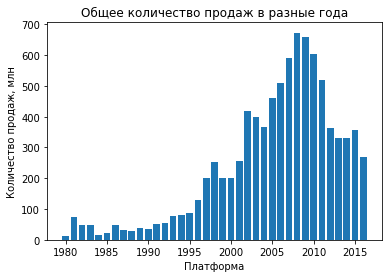

In [42]:
plt.bar(
    df['year'].value_counts().sort_values().index,
    df.groupby('year')['total_sales'].sum().sort_values()
)
plt.title('Общее количество продаж в разные года')
plt.ylabel("Количество продаж, млн")
plt.xlabel("Платформа");

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. Общее количество выпущенных игр закономерно растает из года в год. Исключением стал 2012 год, когда количество новых игр упало в 2 раза и держится на одном уровне вплоть до 2016 года.


2. Количество новых игр в начале развития индустрии было очень мало. В период 1980-1994 года было выпущено 468 игр, что меньше за любой годовой период, начиная с 2001 года.

### Анализ продаж игр на разных платформах в разные годы

In [43]:
(
 df.pivot_table(index='platform',
               values='total_sales',
               aggfunc='count')
   .sort_values(by='total_sales', ascending=False)   
)

,total_sales
platform,
PS2,2136
DS,2122
PS3,1306
Wii,1286
X360,1234
PSP,1195
PS,1190
PC,958
GBA,811


<div style="background-color:#6C7379; color:#ffffff; text-align:start; padding:2%">
    
Построим распределение продаж по годам для платформ, на которых можно было играть в минимум 800 различных игр.

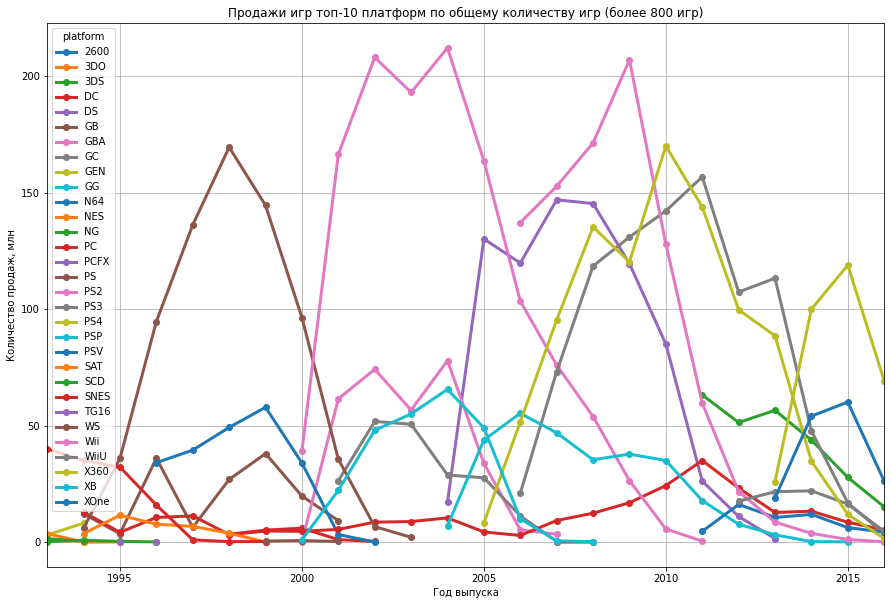

In [45]:
df_pivot = df.pivot_table(index='year',
                          columns='platform',
                          values='total_sales',
                          aggfunc='sum')

df_pivot.plot(figsize=(15,10),
                             marker='o',
                             markersize=6,
                             linewidth = 3,
                             xlim=(1993, 2016),
                             grid=True,
                             title='Продажи игр топ-10 платформ по общему количеству игр (более 800 игр)',
                             xlabel='Год выпуска',
                             ylabel='Количество продаж, млн');

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. Не все платформы одинаково популярны для выпуска игр: менее 100 игр выпустили сразу для 11 платформ. На самых популярных платформах можно играть более чем в 2000 разных игр.


2. Абсолютно все платформы имеют свой "цикл жизни": в течение первых 2-4 лет идет увеличение количества новых игр и увеличение продаж, после чего также в течение 2-4 лет количество падает. В определенный момент игры могут вовсе перестают выпускаться. Полный "цикл жизни" платформы в среднем составляет 5-10 лет. Исключение - универсальный **PC**: новые игры на него выпускаются с начала 1990-х годов по сей день.

### Определение актуального периода для прогноза на 2017 год

<div style="background-color:#6C7379; color:#ffffff; text-align:start; padding:2%">

Исходя из предыдущего анализа видно, что для большинства платформ игры больше не выпускаются. Популярные недавно платформы **DS** и **PSP** не имеют новых игр с 2013 и 2015 годов соответственно. В 2016 году новые игры появились только для четырех платформ: **PS3**, **X360**, **Wii** и **PC**.


Цикл жизни первых трех платформ подходит к концу, поэтому имеет смысл анализировать только последние 3 года. Для **PC** каждый год новые игры выпускаются приблизительно одинаково и продаются также, поэтому для этой платформы также можно рассмотреть последние 3 года.


Таким образом, получим новые данные, по которым можно будет составить прогноз на 2017 год.

In [47]:
df_relevant = df.query('year >= 2014').reset_index(drop=True)

### Анализ продаж игр и потенциальной прибыльности

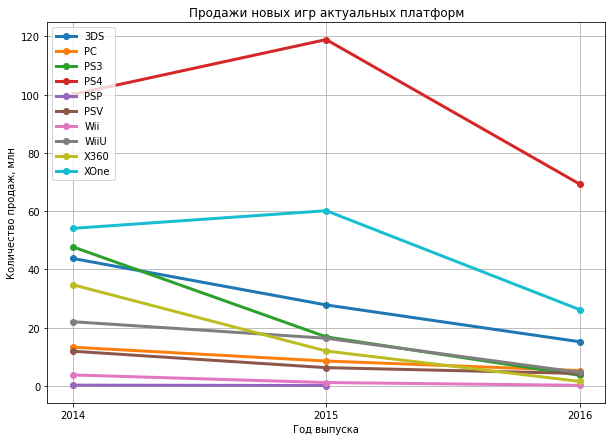

In [48]:
(
    df_relevant.pivot_table(
        index='year',
        columns='platform',
        values='total_sales',
        aggfunc='sum')
    .plot(
        figsize=(10, 7),
        marker='o',
        markersize=6,
        linewidth=3,
        grid=True,
        title='Продажи новых игр актуальных платформ',
        xlabel='Год выпуска',
        ylabel='Количество продаж, млн'
    )
);
x_ticks = [2014, 2015, 2016]
plt.xticks(ticks=x_ticks)
plt.legend(loc='upper left');

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. В 2017 году новые игры будут продаваться не более, чем для 9 платформ. В 2016 году лидирами стали платформы **PS4**, **XOne** и **3DS**.


2. Продажи новых игр в последние 3 года неуклонно падают. В 2016 году три лидирующие платформы имеют более 10 млн продаж.

### Анализ продажам игр на разных платформах за последние 3 года

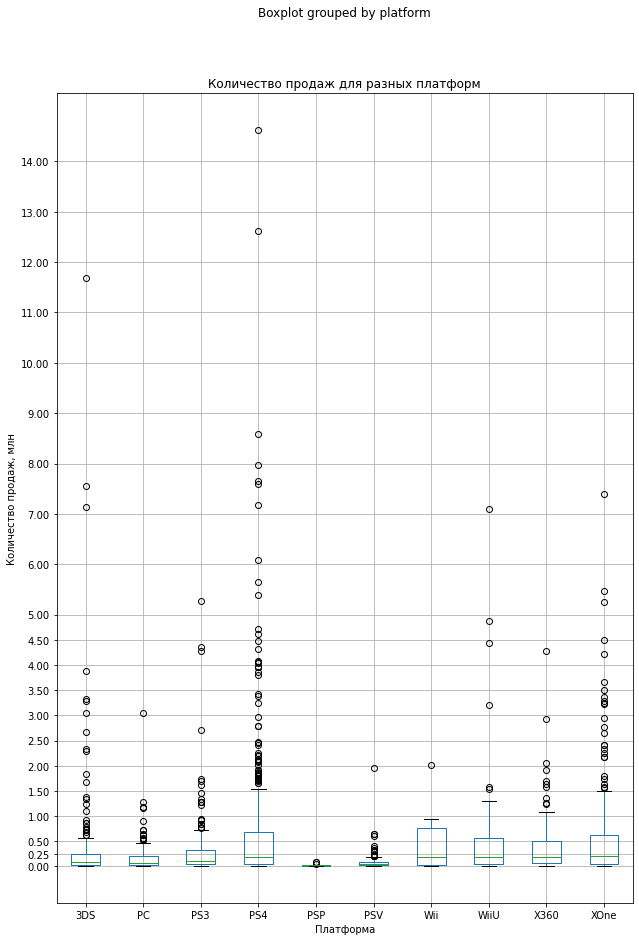

In [49]:
df_relevant.boxplot(column='total_sales',
                    by='platform',
                    figsize=(10,15))
plt.title('Количество продаж для разных платформ')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн');
y_ticks = [0, 0.25, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
plt.yticks(ticks=y_ticks);

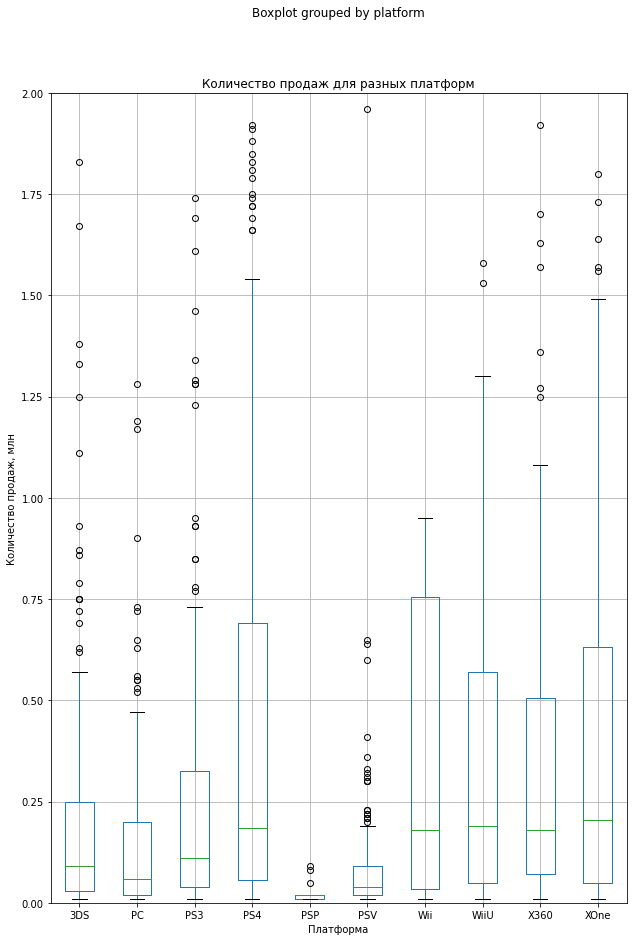

In [86]:
# Код ревьюера
df_relevant.boxplot(column='total_sales',
                    by='platform',
                    figsize=(10,15))
plt.title('Количество продаж для разных платформ')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн')
plt.ylim(0, 2)
plt.show()

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. Медианные значения продаж всех платформ находятся на уровне менее 250 тысяч. Большинство платформ имеют многочисленные выбросы: показатели продаж отдельной игры могу превышать средние значения в десятки раз. 


2. Данная диаграмма подтверждает предыдущее заключение: платформы **PS4**, **XOne** и **3DS** выглядят ниаболее перспктивными для продаж. У них самый большой межквартильный размах, а также больше количество выбросов, превышающих средние значения.

### Анализ корреляции продаж и оценкой пользователей / критиков

In [51]:
df_relevant_score = df_relevant.query('~(user_score.isna()) and ~(critic_score.isna())')

In [52]:
df_relevant_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 1 to 1682
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          704 non-null    object 
 1   platform      704 non-null    object 
 2   year          704 non-null    int32  
 3   genre         704 non-null    object 
 4   na_sales      704 non-null    float32
 5   eu_sales      704 non-null    float32
 6   jp_sales      704 non-null    float32
 7   other_sales   704 non-null    float32
 8   total_sales   704 non-null    float64
 9   critic_score  704 non-null    float64
 10  user_score    704 non-null    float64
 11  esrb_rating   704 non-null    object 
dtypes: float32(4), float64(3), int32(1), object(4)
memory usage: 57.8+ KB


#### Платформа ``PS4``

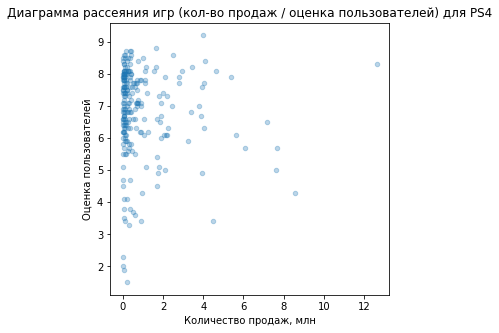

In [53]:
# диаграмма рассеяния для оценки пользователей
df_relevant_score[df_relevant_score['platform'] == 'PS4'].plot(x='total_sales',
                                                   y='user_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 5),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка пользователей) для PS4',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка пользователей');

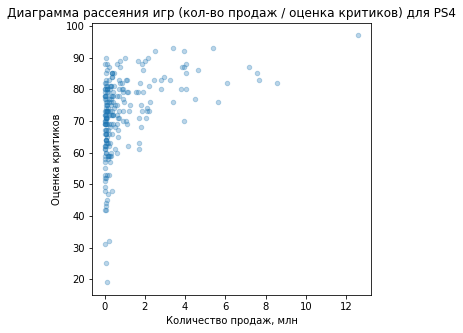

In [54]:
# диаграмма рассеяния для оценки критиков
df_relevant_score[df_relevant_score['platform'] == 'PS4'].plot(x='total_sales',
                                                   y='critic_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 5),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка критиков) для PS4',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка критиков');

In [55]:
# корреляция продаж / оценки пользователей
df_relevant_score.query('platform == "PS4"')['total_sales'].corr(df_relevant['user_score'])

-0.04318585997193634

In [56]:
# корреляция продаж / оценки критиков
df_relevant_score.query('platform == "PS4"')['total_sales'].corr(df_relevant['critic_score'])

0.40190287811475334

#### Платформа ``XOne``

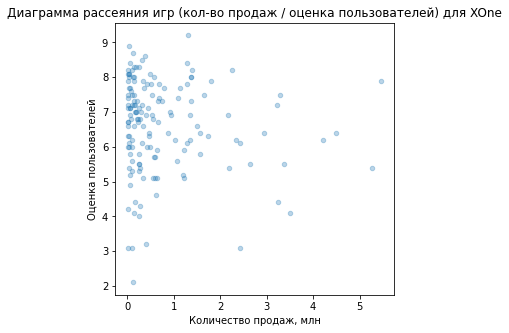

In [57]:
# диаграмма рассеяния для оценки пользователей
df_relevant_score[df_relevant_score['platform'] == 'XOne'].plot(x='total_sales',
                                                   y='user_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 5),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка пользователей) для XOne',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка пользователей');

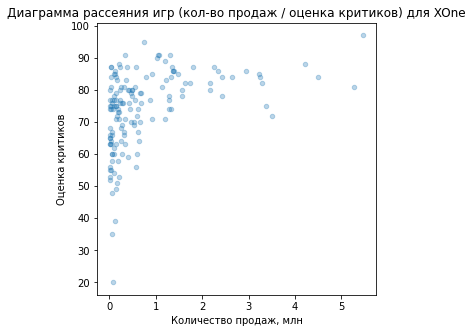

In [58]:
# диаграмма рассеяния для оценки критиков
df_relevant_score[df_relevant_score['platform'] == 'XOne'].plot(x='total_sales',
                                                   y='critic_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 5),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка критиков) для XOne',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка критиков');

In [59]:
# корреляция продаж / оценки пользователей
df_relevant_score.query('platform == "XOne"')['total_sales'].corr(df_relevant['user_score'])

-0.09173434503310748

In [60]:
# корреляция продаж / оценки критиков
df_relevant_score.query('platform == "XOne"')['total_sales'].corr(df_relevant['critic_score'])

0.4221118510555765

#### Платформа ``3DS``

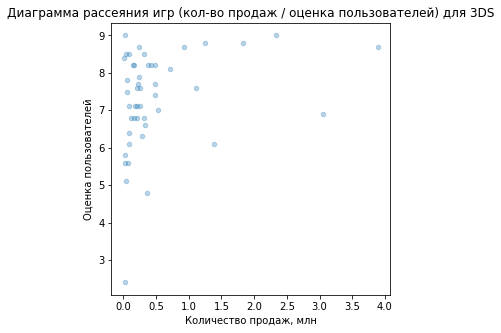

In [61]:
# диаграмма рассеяния для оценки пользователей
df_relevant_score[df_relevant_score['platform'] == '3DS'].plot(x='total_sales',
                                                   y='user_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 5),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка пользователей) для 3DS',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка пользователей');

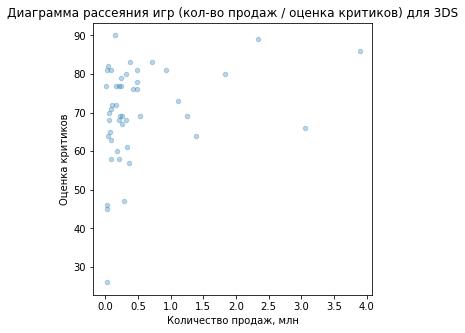

In [62]:
# диаграмма рассеяния для оценки критиков
df_relevant_score[df_relevant_score['platform'] == '3DS'].plot(x='total_sales',
                                                   y='critic_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 5),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка критиков) для 3DS',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка критиков');

In [63]:
# корреляция продаж / оценки пользователей
df_relevant_score.query('platform == "3DS"')['total_sales'].corr(df_relevant['user_score'])

0.2798498792503281

In [64]:
# корреляция продаж / оценки критиков
df_relevant_score.query('platform == "3DS"')['total_sales'].corr(df_relevant['critic_score'])

0.28468579095782925

#### Платформа ``PC``

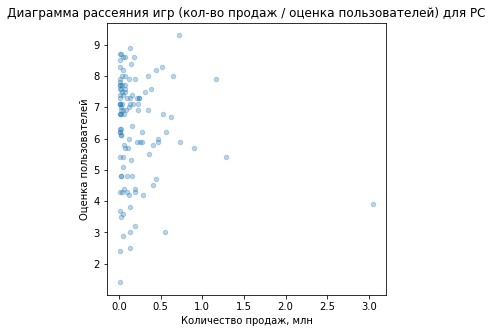

In [65]:
# диаграмма рассеяния для оценки пользователей
df_relevant_score[df_relevant_score['platform'] == 'PC'].plot(x='total_sales',
                                                   y='user_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 5),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка пользователей) для PC',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка пользователей');

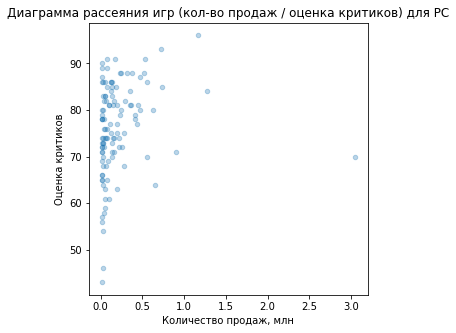

In [66]:
# диаграмма рассеяния для оценки критиков
df_relevant_score[df_relevant_score['platform'] == 'PC'].plot(x='total_sales',
                                                   y='critic_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 5),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка критиков) для PC',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка критиков');

In [67]:
# корреляция продаж / оценки пользователей
df_relevant_score.query('platform == "PC"')['total_sales'].corr(df_relevant['user_score'])

-0.08997391228554938

In [68]:
# корреляция продаж / оценки критиков
df_relevant_score.query('platform == "PC"')['total_sales'].corr(df_relevant['critic_score'])

0.17206091490145103

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">

Для четырех самых популярных за последние 3 года платформ выявлены закономерности:
    
1. Корреляция между количеством продаж и оценкой пользователей слабая (-0.04, -0.09, 0.27 и -0.08). Это говорит о том, что чаще всего связи между ними нет. Возможно, люди заранее выбирают те игры, которые им могут понравиться, и ставят хорошие оценки, но не обязательно покупают самые продающиеся варианты.


2. Корреляция между количеством продаж и оценкой критиков всегда положиетльная и сильнее (0.40, 0.42, 0.28 и 0.17). Это говорит о том, что в критики чаще положительно оценивают те игры, которые хорошо продаются, или, наоборот, хорошо продаются те игры, которые хорошо оцениваются критиками. Однако связь недостаточно сильная, чтобы точно полагаться на оценку критиков при планировании продаж.
    
    
3. Платформа `3DS` имеет игры, которые одинаково оцениваются как критиками, так и пользователями. Но связь недостаточно сильная.
    
    
4. Для остальных платформ полагаться на оценку критиков стоит чаще, чем на оценку пользователей.

### Анализ продаж игр в зависимости от жанра

In [69]:
df_relevant.groupby('genre')['total_sales'].sum().sort_values()

genre
Puzzle            2.21
Strategy          3.96
Simulation       13.13
Adventure        17.55
Platform         18.09
Racing           27.52
Fighting         28.22
Misc             37.55
Role-Playing    101.44
Sports          109.48
Shooter         170.94
Action          199.36
Name: total_sales, dtype: float64

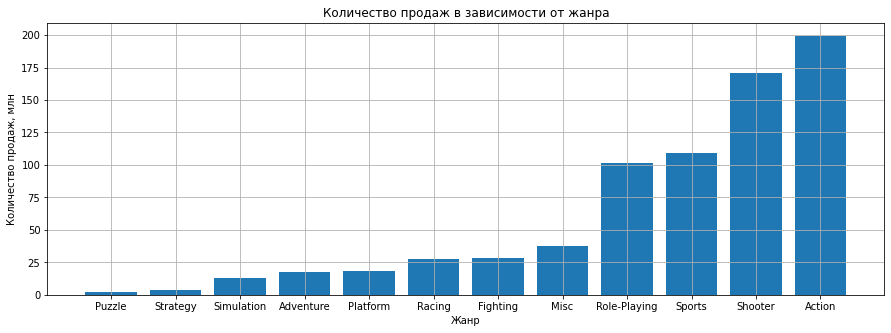

In [70]:
plt.figure(figsize=(15, 5))

plt.bar(
    df_relevant.groupby('genre')['total_sales'].sum().sort_values().index,
    df_relevant.groupby('genre')['total_sales'].sum().sort_values()
)
plt.title('Количество продаж в зависимости от жанра')
plt.grid(True)
plt.xlabel("Жанр")
plt.ylabel("Количество продаж, млн");

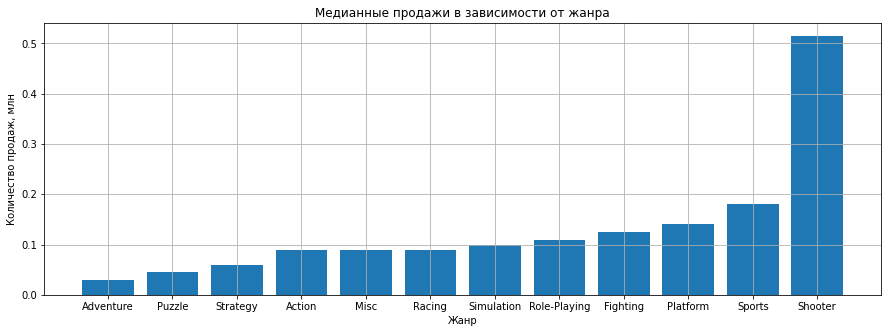

In [71]:
plt.figure(figsize=(15, 5))

plt.bar(
    df_relevant.groupby('genre')['total_sales'].median().sort_values().index,
    df_relevant.groupby('genre')['total_sales'].median().sort_values()
)
plt.title('Медианные продажи в зависимости от жанра')
plt.grid(True)
plt.xlabel("Жанр")
plt.ylabel("Количество продаж, млн");

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. Количество продаж неравномерно распределено по жанрам:
   - топ-3 самых продающихся: **Action** (199.36 млн), **Shooter** (170.94 млн) и **Sports** (109.48 млн)
   - худшие по продажам: **Puzzle** (2.21 млн) и **Strategy** (3.96 млн)
    
    
2. Самый прибыльный жанр можно определить не только по общему количеству продаж, но и по медианному значению продажи для одной игры. В этом случае ситуация меняется:
    - не перврое место с большим отрывом выходит жанр **Shooter**
    - далее идет плавное снижение по все жанрам (**Sports** сохраняет лидирующие позиции, а **Action** теряет их)
    - **Puzzle** и **Strategy** по-прежнему составляют тройку худших по продажам

In [72]:
df_relevant.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

### Вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. В начале развития индустрии новых игр было очень мало (до 1994 года выпускалось менее 100 игр в год). Далее последовал скачок, и с каждым годом игр становилось на порядок больше. Максимум новых игр зафиксировано в 2009 году (1426), после чего уровень постепенно уменьшается и составляет 502 игры в 2016 году.


2. Абсолютно все платформы имеют свой "цикл жизни" в 5-10 лет: сначала новы игр выходит больше, затем снижается и далее новые игры не выходят. Исключение - универсальный **PC**: игры на него выпускаются с начала 1990-х годов по сей день.


3. За основу прогноза взяты данные трех последних лет по 10 плафтормам, новые игры на которые по-прежнему выпускаются: **PS4**, **3DS**, **XOne**, **WiiU**, **PS3**, **X360**, **PC**, **Wii**, **PSV** и **PSP**.


4. Продажи новых игр в последние 3 года неуклонно падают. В 2016 году три лидирующие платформы (**PS4**, **3DS**, **XOne**) имеют более 10 млн продаж.


5. Медианные значения продаж всех платформ находятся на уровне 250 тысяч. Медианные значения продаж также подтверждают вывод о том, что самые популярные платформы - это **PS4**, **3DS**, **XOne**.


6. Корреляция между количеством продаж и оценкой пользователей - слабая, однако для оценки критиков ситуация лучше: последние чаще положительно оценивают те игры, которые будут хорошо продаваться, или, наоборот, хорошо продаются те игры, которые хорошо оцениваются критиками.


7. Топ-3 самых продающихся жанров за последние 3 года: **Action** (199.36 млн), **Shooter** (170.94 млн) и **Sports** (109.48 млн). Хуже всего продаются: **Puzzle** (2.21 млн) и **Strategy** (3.96 млн).
    
    
8. Самый прибыльный жанр по среднему количеству продаж на игру - **Shooter** (более чем в 2 раза, чем любой другой жанр). Худшие жанры по этому показателю прежние: **Puzzle** и **Strategy**.

## Составление портрета пользователя каждого региона

### Самые популярные платформы по регионам

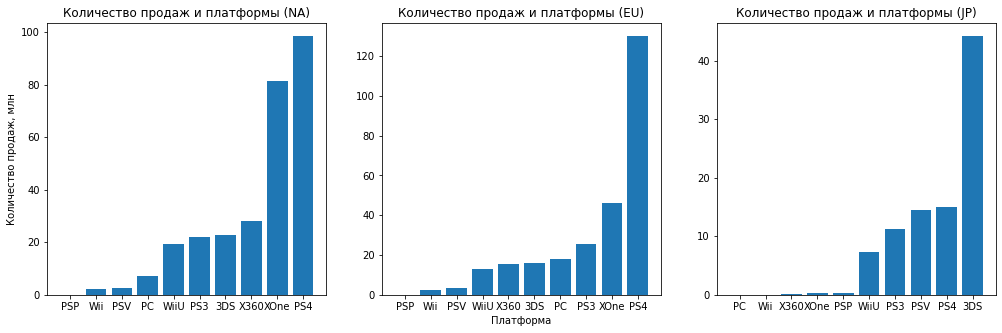

In [73]:
# создадим одну фигуру для трех столбчатых диаграмм
plt.figure(figsize=(17, 5))

# первая диаграмма
plt.subplot(131)
plt.bar(
    df_relevant.groupby('platform')['na_sales'].sum().sort_values().index,
    df_relevant.groupby('platform')['na_sales'].sum().sort_values()
)
plt.title('Количество продаж и платформы (NA)')
plt.ylabel("Количество продаж, млн")

# вторая диаграмма
plt.subplot(132)
plt.bar(
    df_relevant.groupby('platform')['eu_sales'].sum().sort_values().index,
    df_relevant.groupby('platform')['eu_sales'].sum().sort_values()
)
plt.title('Количество продаж и платформы (EU)')
plt.xlabel("Платформа")

# третья диаграмма
plt.subplot(133)
plt.bar(
    df_relevant.groupby('platform')['jp_sales'].sum().sort_values().index,
    df_relevant.groupby('platform')['jp_sales'].sum().sort_values()
)
plt.title('Количество продаж и платформы (JP)')

plt.show()

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. В регионе NA продажи сильно зависят от платформы: заметно лучше продаются игры для **PS4** (100 млн) и **XOne** (80 млн), плохо - для **PSP** (менее 1 млн). Топ-5: **PS4*, **XOne**, **X360**, **3DS**, **PS3**.


2. В регионе EU есть ситуация схожая, отличие лишь в том, что отрыв **PS4** от **XOne** более чем в  2 раза. Топ-5: **PS4*, **XOne**, **PS3**, **PC**, **3DS**.


3. В регионе JP лидер продаж - **3DS** (более 40 млн). Далее идут 4 платформы со приблизительно равным числом продаж: **PS4**, **PSV*, **PS3** и **WiiU** (8-15 млн). Все остальные платформы имеют минимум продаж.
    
    
4. Таким образом видно, что рынок для NA и EU в целом схож. В регионе JP картина сильно отличается.

### Самые популярные жанры по регионам

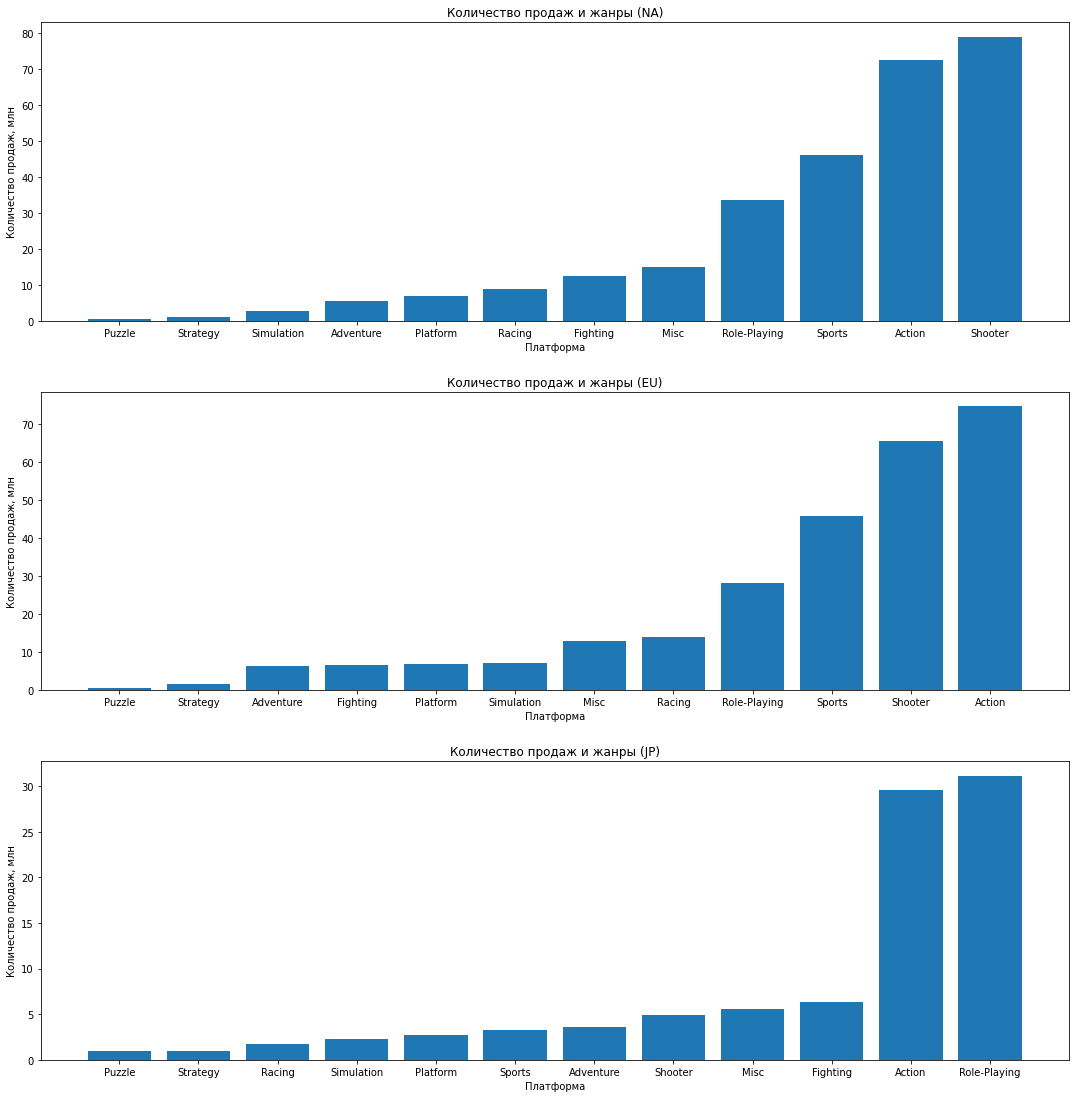

In [74]:
# создадим одну фигуру для трех столбчатых диаграмм другим способом
f, ax = plt.subplots(3, 1, figsize=(15, 15))
f.tight_layout(h_pad=5)

# первая диаграмма
ax[0].bar(
    df_relevant.groupby('genre')['na_sales'].sum().sort_values().index,
    df_relevant.groupby('genre')['na_sales'].sum().sort_values()
)
ax[0].set_xlabel('Платформа')
ax[0].set_ylabel('Количество продаж, млн')
ax[0].set_title('Количество продаж и жанры (NA)')

# вторая диаграмма
ax[1].bar(
    df_relevant.groupby('genre')['eu_sales'].sum().sort_values().index,
    df_relevant.groupby('genre')['eu_sales'].sum().sort_values()
)
ax[1].set_xlabel('Платформа')
ax[1].set_ylabel('Количество продаж, млн')
ax[1].set_title('Количество продаж и жанры (EU)')

# третья диаграмма
ax[2].bar(
    df_relevant.groupby('genre')['jp_sales'].sum().sort_values().index,
    df_relevant.groupby('genre')['jp_sales'].sum().sort_values()
)
ax[2].set_xlabel('Платформа')
ax[2].set_ylabel('Количество продаж, млн')
ax[2].set_title('Количество продаж и жанры (JP)')
pass

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">

Общая картина распределения глобальных продаж по жанрам повторяется для NA и EU:
    
1. ТОП-5 в регионе NA: **Shooter**, **Action**, **Sports**, **Role-Playing**, **Misc**.
    
    
2. ТОП-5 в регионе EU: **Action**, **Shooter**, **Sports**, **Role-Playing**, **Racing**.
    

В регионе JP картина отличается: лидеры с большим отрывом - это жанры **Role-Playing** и **Action**.
    
3. ТОП-5 в регионе JP: **Role-Playing**, **Action**, **Fighting**, **Misc**, **Shooter**.

### Анализ влияния рейтинга ESRB на продажи по регионам

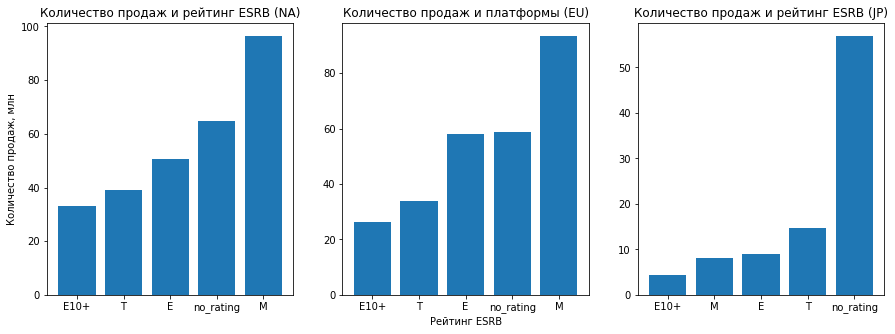

In [75]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(
    df_relevant.groupby('esrb_rating')['na_sales'].sum().sort_values().index,
    df_relevant.groupby('esrb_rating')['na_sales'].sum().sort_values()
)
plt.title('Количество продаж и рейтинг ESRB (NA)')

plt.ylabel("Количество продаж, млн")

plt.subplot(132)
plt.bar(
    df_relevant.groupby('esrb_rating')['eu_sales'].sum().sort_values().index,
    df_relevant.groupby('esrb_rating')['eu_sales'].sum().sort_values()
)
plt.title('Количество продаж и платформы (EU)')
plt.xlabel("Рейтинг ESRB")

plt.subplot(133)
plt.bar(
    df_relevant.groupby('esrb_rating')['jp_sales'].sum().sort_values().index,
    df_relevant.groupby('esrb_rating')['jp_sales'].sum().sort_values()
)
plt.title('Количество продаж и рейтинг ESRB (JP)')

plt.show()

#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. В NA и EU больше всего игр выходит для взрослых. На втором меcте онлайн-игры без указания рейтинга. Далее идут игры для любого возраста и подростков (13 лет и более)
    
    
2. Самые большие отличия в продажах по рейтингу - для региона JP. Здесь со значительным лидерством преобладают продажи онлайн-игр. Игры для подростков больше, чем для взрослых.
    
    
3. В JP, вероятно, существует свой внутренний национальный рейтинг.

### Вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


1. Портрет пользователя в регионе (NA) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **PS4** или **XOne**
    - предпочитает жанры **Shooter**, **Action** и **Sports**
    - приобретет игру для взрослых или онлайн-игру


2. Портрет пользователя в регионе (EU) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **PS4** или **XOne**
    - предпочитает жанры **Action**, **Shooter** и **Sports**
    - приобретет игру для взрослых или онлайн-игру


3. Портрет пользователя в регионе (JP) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **3DS**
    - предпочитает жанры **Role-Playing** и **Action**
    - приобретет онлайн-игру или игру для подростков
    
    
4. В JP, вероятно, существует свой внутренний национальный рейтинг.

## Проверка гипотез

### Проверка гипотезы: средние пользовательские рейтинги платформ XOne и PC одинаковые

In [77]:
# для выдвижения гипотез посмоттрим среднее значение для двух платформ
# используем переменную df_relevant_score, которая не содержит пропущенных значений
df_xone_user_score = df_relevant_score.query('platform == "XOne"')['user_score']
display(df_xone_user_score.mean())

df_pc_user_score = df_relevant_score.query('platform == "PC"')['user_score']
df_pc_user_score.mean()

6.620529801324504

6.3417391304347825

<div style="background-color:#6C7379; color:#ffffff; text-align:start; padding:2%">

**Нулевая гипотеза**: средний пользовательский рейтинг платформы **XOne** `равен` аналогичному рейтингу платформы **PC**.

**Альтернативная гипотеза**: средний пользовательский рейтинг платформы **XOne** `не равен` аналогичному рейтингу платформы **PC**.

In [78]:
alpha = 0.05

result = st.ttest_ind(df_xone_user_score, df_pc_user_score)

print('P-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 0.12817793652639856
Не получилось отвергнуть нулевую гипотезу


#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


Нулевая гипотеза подтвердилась: вероятнее всего средний пользовательский рейтинг платформы **XOne** `равен` аналогичному рейтингу платформы **PC**.

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

In [80]:
# для выдвижения гипотез посмоттрим среднее значение для двух жанров
# используем переменную df_relevant_score, которая не содержит пропущенных значений
df_action_user_score = df_relevant_score.query('genre == "Action"')['user_score']
display(df_action_user_score.mean())

df_sports_user_score = df_relevant_score.query('genre == "Sports"')['user_score']
df_sports_user_score.mean()

6.832599118942731

5.68433734939759

<div style="background-color:#6C7379; color:#ffffff; text-align:start; padding:2%">

**Нулевая гипотеза**: средний пользовательский рейтинг жанра **Action** `равен` аналогичному рейтингу жанра **Sports**.

**Альтернативная гипотеза**: средний пользовательский рейтинг жанра **Action** `больше` аналогичного рейтинга жанра **Sports**.

In [81]:
result = st.ttest_ind(df_action_user_score, df_sports_user_score, alternative='greater')

print('P-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 2.0270447999971618e-10
Отвергаем нулевую гипотезу


#### Промежуточный вывод
<div style="border: dashed 10px; background-color:#6C7379; color:#ffffff; padding: 20px">


Нулевая гипотеза отвергнута: есть основания говорить, что средний пользовательский рейтинг жанра **Action** `больше` аналогичного рейтинга жанра **Sports**.

## Подведение итогов

<div style="border: dashed 10px; background-color:#002D6B; color:#ffffff; padding: 20px">


1. Изначальные данные содержат 11435 игр, выпущенные с 1980 года по 2016 год и представленные в 12 жанрах. Игры могут представлены в 10 и более вариантах в зависимости от платформы и года выпуска. Данные нуждались в объемной предобработке.


2. После предобработки удалено 1.5 % информации с отсутствующей информацией о дате выпуска. Пропущено около 50 % информации об оценке пользователей и критиков. Анализ оценки пользователей проводился по имеющимся данным.


3. В процессе обсуждения работы с коллегами по когорте был сделан важный вывод. Данные отражают не количество продаж по годам, а количество продаж для игр конкретного года выпуска. Поэтому в ходу исследования было принято допущение, что пик продаж приходится на год релиза игры, а прогнозы делаются для новых игр.


4. Количество выпущенных игр с каждым годом увеличивалось с максимум в 2009 году (1426 новых игр), что связано как с увеличением продаж, так и с созданием новых платформ и перевыпуском уже существующих игр. Абсолютно все платформы имеют свой "цикл жизни" в 5-10 лет, за исключением универсального **PC**. В последний год было выпущено 502 новые игры.


5. На основе данных за последние 3 года были проанализированы все 10 платформ (**PS4**, **3DS**, **XOne**, **WiiU**, **PS3**, **X360**, **PC**, **Wii**, **PSV** и **PSP**), для которых еще выпускаются игры. Продажи новых игр в последние 3 года неуклонно падают. В 2016 году три лидирующие платформы (**PS4**, **3DS**, **XOne**) имеют более 10 млн продаж. Медианное значение продаж каждой платформы находится на уровне 250 тысяч копий в год.


6. Корреляция между количеством продаж и оценкой пользователей практически отсутствует, для критиков ситуация лучше: они чаще положительно оценивают те игры, которые будут хорошо продаваться. Топ-3 самых продающихся жанров за последние 3 года: **Action** (199.36 млн), **Shooter** (170.94 млн) и **Sports** (109.48 млн), а самый прибыльный жанр по среднему количеству продаж на игру - **Shooter**. Хуже всего продаются: **Puzzle** (2.21 млн) и **Strategy** (3.96 млн).


7. Портрет пользователя в регионе (NA) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **PS4** или **XOne**
    - предпочитает жанры **Shooter**, **Action** и **Sports**
    - приобретет игру для взрослых или онлайн-игру


8. Портрет пользователя в регионе (EU) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **PS4** или **XOne**
    - предпочитает жанры **Action**, **Shooter** и **Sports**
    - приобретет игру для взрослых или онлайн-игру


9. Портрет пользователя в регионе (JP) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **3DS**
    - предпочитает жанры **Role-Playing** и **Action**
    - приобретет онлайн-игру или игру для подростков (В JP, вероятно, существует свой внутренний национальный рейтинг)
 
    
10. Проверены две важные гипотезы. Вероятнее всего средний пользовательский рейтинг платформы **XOne** `равен` аналогичному рейтингу платформы **PC**. Также есть основания говорить, что средний пользовательский рейтинг жанра **Action** `больше` аналогичного рейтинга жанра **Sports**.

## Рекомендации

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">

<b>В 2017 году будет выгодно продавать новые игры со следующими характеристиками:</b>

- для платформ **PS4** и **XOne** в регионах EU / NA и только для **3DS** в регионе JP
 - для любителей жанров **Shooter**, **Action**, **Sports** в регионах EU / NA и **Role-Playing**, **Action** в регионе JP
 - для взрослых любителей онлайн-игр (без рейтинга ESRB) вне зависимости от региона, а также для взрослых в регионах EU / NA и для подростков в регионе JP
 - для платформы **XOne** в силу статистически равного пользовательского рейтинга c самой стабильной платформой **PC**
 - для любителей жанра **Action** в силу статистически большего пользовательского рейтинга другого популярного жанра **Sports**
 - с хорошей оценкой критиков для определения уровня продаж в качестве дополнительного критерия</div>